In [1]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import glob


In [2]:
file = "C://Users/16823/Desktop/Research Papers/Retinal_Datasets/iChallenge-AMD-Training400/Non-AMD/" 

img_file = list(glob.glob1(file, "*.jpg"))
img = []
for i in img_file:
    img.append(i)

data = []
for i in img:
    image_path = file + i
    gray=Image.open(image_path)
    gray_resiz = gray.resize((256, 256))
    arr_gray = np.array(gray_resiz)
    data.append(arr_gray)


In [3]:
d = np.array(data)


In [4]:
d.shape

(311, 256, 256, 3)

In [5]:
file1 = "C://Users/16823/Desktop/Research Papers/Retinal_Datasets/iChallenge-AMD-Training400/AMD/" 

img_file1 = list(glob.glob1(file1, "*.jpg"))
img1 = []
for i in img_file1:
    img1.append(i)

data1 = []
for i in img1:
    image_path1 = file1 + i
    gray1=Image.open(image_path1)
    gray_resiz1 = gray1.resize((256, 256))
    arr_gray1 = np.array(gray_resiz1)
    data1.append(arr_gray1)


In [6]:
d1 = np.array(data1)


In [7]:
d1.shape

(89, 256, 256, 3)

In [8]:
df = np.concatenate((d, d1), axis = 0)
df.shape

(400, 256, 256, 3)

In [9]:
d_label = [0]*311
d1_label = [1]*89

In [10]:
y = np.concatenate([d_label, d1_label])


In [11]:
import keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras.utils import np_utils

In [12]:
# # #Spliting the data in 80:20 training to testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 0)

# x_train = pd.concat([df.iloc[:135, :100], df.iloc[168:303,:100]], axis = 0, ignore_index = True).values
# x_test =pd.concat([df.iloc[135:168, :100], df.iloc[303:,:100]], axis = 0, ignore_index = True).values
# y_train = pd.concat([df.iloc[:135, 100], df.iloc[168:303,100]], axis = 0, ignore_index = True).values
# y_test = pd.concat([df.iloc[135:168, 100], df.iloc[303:, 100]], axis = 0, ignore_index = True).values


In [13]:
import keras
y_train = keras.utils.np_utils.to_categorical(y_train,2)
y_test = keras.utils.np_utils.to_categorical(y_test,2)


In [14]:
y_train.shape

(320, 2)

In [15]:
# Models 
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

from tensorflow.keras.applications import EfficientNetB3
model_cnn = tf.keras.models.Sequential([
    EfficientNetB3(input_shape=(256,256,3), include_top=False),
])
for layer in model_cnn.layers:
  layer.trainable = False

model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.4))
model_cnn.add(Dense(2, activation='sigmoid'))

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 8, 8, 1536)       10783535  
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 64)          884800    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 64)                36928     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

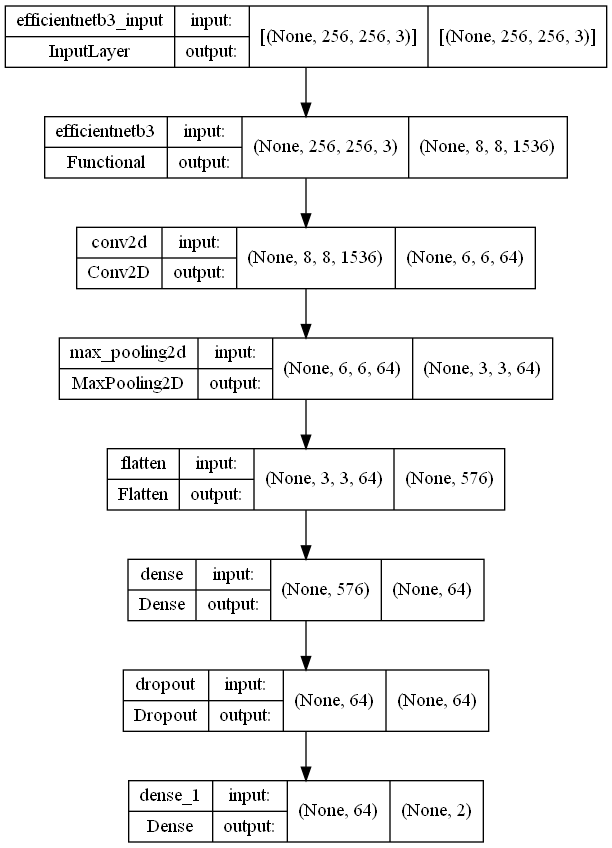

In [16]:
from tensorflow.keras.utils import plot_model

#model = Model(inputs=[mlp.input, model_cnn.input], outputs=x)

plot_model(model_cnn, "multi_input_and_output_model.png", show_shapes=True)

In [17]:

loss = keras.losses.BinaryCrossentropy()
model_cnn.compile(loss= loss, optimizer= 'adam', metrics=['accuracy','Precision','Recall','AUC'])
# train the model
print("[INFO] training model...")

h = model_cnn.fit(x=x_train, y=y_train, epochs=50, batch_size=32)

[INFO] training model...
Epoch 1/50
10/10 [==============================] - 122s 6s/step - loss: 1.2393 - accuracy: 0.7594 - precision: 0.7235 - recall: 0.7031 - auc: 0.7870
Epoch 2/50
10/10 [==============================] - 62s 6s/step - loss: 0.4070 - accuracy: 0.8406 - precision: 0.8313 - recall: 0.8313 - auc: 0.9188
Epoch 3/50
10/10 [==============================] - 64s 6s/step - loss: 0.3596 - accuracy: 0.8469 - precision: 0.8360 - recall: 0.8281 - auc: 0.9198
Epoch 4/50
10/10 [==============================] - 64s 6s/step - loss: 0.2897 - accuracy: 0.8781 - precision: 0.8896 - recall: 0.8562 - auc: 0.9494
Epoch 5/50
10/10 [==============================] - 63s 6s/step - loss: 0.2808 - accuracy: 0.8719 - precision: 0.8700 - recall: 0.8781 - auc: 0.9508
Epoch 6/50
10/10 [==============================] - 71s 7s/step - loss: 0.2271 - accuracy: 0.9250 - precision: 0.9046 - recall: 0.9187 - auc: 0.9705
Epoch 7/50
10/10 [==============================] - 75s 7s/step - loss: 0.2290 -

In [18]:
score = model_cnn.evaluate(x_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])


3/3 [==============================] - 18s 3s/step - loss: 0.6904 - accuracy: 0.9125 - precision: 0.9125 - recall: 0.9125 - auc: 0.9447
loss= 0.6904028058052063
accuracy= 0.9125000238418579
